In [58]:
# CS194-26 (CS294-26): Project 1 starter Python code

# these are just some suggested libraries
# instead of scikit-image you could use matplotlib and opencv to read, write, and display images

import numpy as np
import skimage as sk
import skimage.io as skio

In [59]:
%pylab inline

# This is what %pylab does:
# import numpy
# import matplotlib
# from matplotlib import pylab, mlab, pyplot
# np = numpy
# plt = pyplot

# from IPython.core.pylabtools import figsize, getfigs

from pylab import *
# from numpy import *

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['fft', 'power', 'linalg', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Setup 

In [3]:

# name of the input file
imname = './data/cathedral.jpg'

# read in the image
im = skio.imread(imname)

# convert to double (might want to do this later on to save memory)    
im = sk.img_as_float(im)

In [4]:
# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(np.int)

# separate color channels
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/2988238346.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


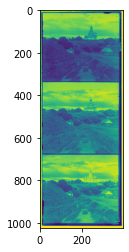

In [5]:
imshow(im)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


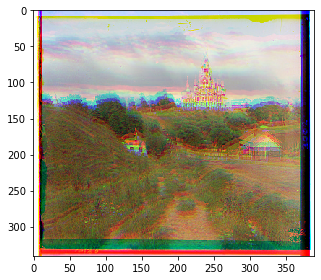

In [6]:
im_out = np.dstack([r, g, b])
# imshow(im_out)
fname = "./results/cathedral_stack.jpg"
skio.imsave(fname, im_out)
# display the image
skio.imshow(im_out)

# Exhaustive Search - SSD

In [60]:
def crop_image(image, fraction):
    # find middle of image horizontally
    find_middle = (len(image) // 2)
    # find start crop point horizontally
    start_index = find_middle - (len(image) // fraction)
    # find end crop point horizontally
    end_index = find_middle + (len(image) // fraction)

    # find middle of iamge vertically
    find_middle_height = len(image[0]) // 2
    start_index_height = find_middle_height - (len(image[0]) // fraction)
    end_index_height = find_middle_height + (len(image[0]) // fraction)
    crop_g = image[start_index:end_index, start_index_height:end_index_height]
    return crop_g

In [61]:
def calculate_ssd(image1, image2):
    return np.sum((image1 - image2) ** 2)


In [62]:
def align_ssd(mover,ref):
    # for some amount of user defined displacement (-15 to 15)
    # keep ref static
    # shift the shift one by the displacement amount 
    # find a score 
    # keep track of the max score
    # max score is the ideal displacement
    # return that shifted image 
    displacements = range(-15, 15)
    min_score = float("inf")
    best_displacement = (float("inf"), float("inf"))
    for x in displacements:
        for y in displacements:
            shifted_mover = np.roll(mover, [x,y], axis=(0,1))
            cropped_shifted_mover = crop_image(shifted_mover, 4)
            cropped_ref = crop_image(ref, 4)
            curr_score = calculate_ssd(cropped_ref, cropped_shifted_mover)
            if curr_score < min_score:
                min_score = curr_score
                best_displacement = [x,y]
    print(best_displacement)
    return np.roll(mover, best_displacement, axis=(0,1))


In [63]:

def exhaustive_search_ssd(filename, out_filename):
    # name of the input file
    imname = filename
    # read in the image
    im = skio.imread(imname)
    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)
    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(np.int)
    # separate color channels
    b = im[:height]
    g = im[height: 2*height]
    r = im[2*height: 3*height]
    # align g and r to b 
    print("green displacement: ")
    ag = align_ssd(g, b)
    print("red displacement: ")
    ar = align_ssd(r, b)
    # create a color image
    im_out = np.dstack([ar, ag, b])
    # save the image
    fname = out_filename
    skio.imsave(fname, im_out)
    # display the image
    skio.imshow(im_out)
    skio.show()

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/2833592057.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


green displacement: 
[5, 2]
red displacement: 


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


[12, 3]


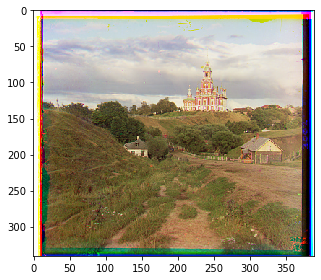

In [64]:
exhaustive_search_ssd('./data/cathedral.jpg', './results/cathedral_exhaustive_ssd.jpg')

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/2833592057.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


green displacement: 
[3, 3]
red displacement: 
[7, 3]


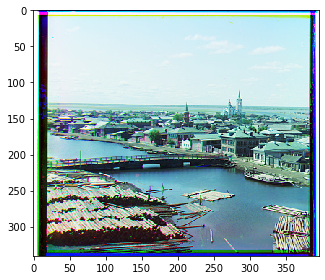

In [65]:
exhaustive_search_ssd("./data/tobolsk.jpg", "./results/tobolsk_exhaustive_ssd.jpg")

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/2833592057.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


green displacement: 
[-3, 2]
red displacement: 
[3, 2]


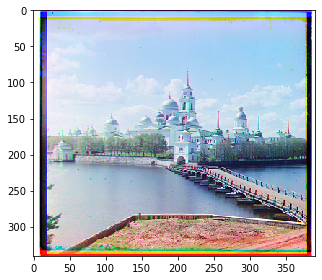

In [66]:
exhaustive_search_ssd("./data/monastery.jpg", "./results/monastery_exhaustive_ssd.jpg")

# Exhaustive Search - NCC

In [68]:
def calculate_ncc(image1, image2):
    return np.sum((image1 / np.linalg.norm(image1)) * (image2 / np.linalg.norm(image2)))
    

In [69]:
def align_ncc(mover,ref):
    # for some amount of user defined displacement (-15 to 15)
    # keep ref static
    # shift the shift one by the displacement amount 
    # find a score 
    # keep track of the max score
    # max score is the ideal displacement
    # return that shifted image 
    displacements = range(-15, 15)
    max_score = float("-inf")
    best_displacement = (float("inf"), float("inf"))
    for x in displacements:
        for y in displacements:
            shifted_mover = np.roll(mover, [x,y], axis=(0,1))
            cropped_shifted_mover = crop_image(shifted_mover, 4)
            cropped_ref = crop_image(ref, 4)
            curr_score = calculate_ncc(cropped_ref, cropped_shifted_mover)
            if curr_score > max_score:
                max_score = curr_score
                best_displacement = [x,y]
    print(best_displacement)
    return np.roll(mover, best_displacement, axis=(0,1))

In [70]:

def exhaustive_search_ncc(filename, out_filename):
    # name of the input file
    imname = filename
    # read in the image
    im = skio.imread(imname)
    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)
    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(np.int)
    # separate color channels
    b = im[:height]
    g = im[height: 2*height]
    r = im[2*height: 3*height]
    # align g and r to b
    print("Green Displacement: ") 
    ag = align_ncc(g, b)
    print("Red Displacement: ")
    ar = align_ncc(r, b)
    # create a color image
    im_out = np.dstack([ar, ag, b])
    # save the image
    fname = out_filename
    skio.imsave(fname, im_out)
    # display the image
    skio.imshow(im_out)
    skio.show()

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/1557145346.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


Green Displacement: 
[5, 2]
Red Displacement: 


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


[12, 3]


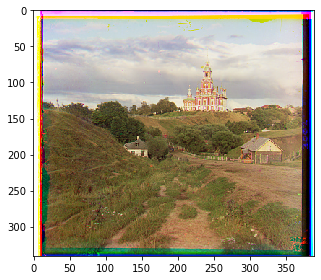

In [71]:
exhaustive_search_ncc('./data/cathedral.jpg', './results/cathedral_exhaustive_ncc.jpg');

Green Displacement: 


/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/1557145346.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


[3, 3]
Red Displacement: 


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


[7, 3]


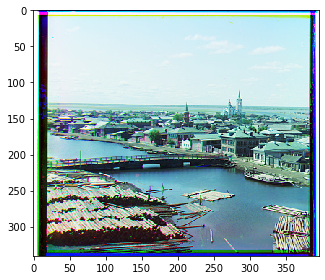

In [72]:
exhaustive_search_ncc('./data/tobolsk.jpg', './results/tobolsk_exhaustive_ncc.jpg');

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/1557145346.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


Green Displacement: 
[-3, 2]
Red Displacement: 


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


[3, 2]


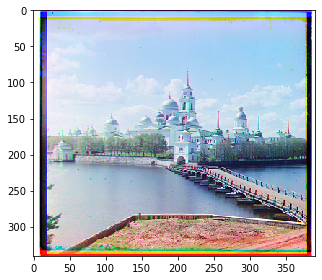

In [73]:
exhaustive_search_ncc('./data/monastery.jpg', './results/monastery_exhaustive_ncc.jpg');

# Image Pyramid - NCC

In [74]:
# on small scale shift from -15 to 15  (ex: shift = [2, 3])
# on smaller scale , shift from -7 to 7 but dont center at 0, center at the previous shift (ex: [2 +- 7, 3 +- 7]) and set optimal shift to the value center 
# then go onwards and shift less and less at each layer, updating center each layer 
from skimage.transform import rescale

In [75]:
# NCC 
def calculate_shift(mover, ref, center, last_range):
    range_val = last_range // 2
    center_x = center[0]
    center_y = center[1]
    displacements_x = range(-1 * (range_val + 1)+ center_x, (range_val + 1) + center_x)
    displacements_y = range(-1 * (range_val + 1) + center_y, (range_val + 1) + center_y)
    max_score = float("-inf")
    best_displacement = (float("inf"), float("inf"))
    cropped_mover = crop_image(mover, 4)
    cropped_ref = crop_image(ref, 4)
    for x in displacements_x:
        for y in displacements_y:
            shifted_mover = np.roll(cropped_mover, [x,y], axis=(0,1))
            curr_score = calculate_ncc(cropped_ref, shifted_mover)
            if curr_score > max_score:
                max_score = curr_score
                best_displacement = [x,y]
                
    return best_displacement

In [76]:
def image_pyramid(image1, image2):
    if image1.shape <= (64, 64) and image2.shape <= (64,64):
        displacement = 30
        center = (0,0)
        shift = calculate_shift(image1, image2, center, displacement)
        return shift, displacement, center 
    else: 
        rescaled_im1 = rescale(image1, 0.5)
        rescaled_im2 = rescale(image2, 0.5)
        shift, displacement, center = image_pyramid(rescaled_im1, rescaled_im2)
        center = tuple([sum(x) for x in zip(center,shift)])
        displacement = int(displacement // 2)
        if displacement <= 1:
            displacement = 1
        shift = calculate_shift(image1, image2, center, displacement)
        return shift, displacement, center

In [77]:
def image_pyramid_ncc(filename, out_filename, quality):
    # name of the input file
    imname = filename
    # read in the image
    im = skio.imread(imname)
    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)
    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(np.int)
    # separate color channels
    b = im[:height]
    g = im[height: 2*height]
    r = im[2*height: 3*height]
    # align g 
    shift_g, disp_g, center_g = image_pyramid(g,b)
    print("Green Shift: " + str(shift_g))
    ag = np.roll(g, shift_g, axis=(0,1))
    # align r
    shift_r, disp_r, center_r = image_pyramid(r,b)
    print("Red Shift: " + str(shift_r))
    ar = np.roll(r, shift_r, axis=(0,1))
    # create a color image
    im_out = np.dstack([ar, ag, b])
    # im_out = np.dstack([ar, ag, b])
    # save the image
    fname = out_filename
    skio.imsave(fname, im_out, quality=quality)
    # display the image
    fig, ax = subplots(figsize=(2.5,2.5))
    ax.imshow(im_out)
    skio.show()

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/25281069.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


Green Shift: [68, -40]
Red Shift: [100, -64]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


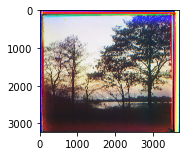

Green Shift: [48, -5]
Red Shift: [84, -24]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


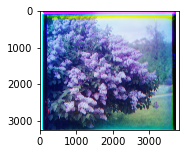

Green Shift: [28, 12]
Red Shift: [68, 28]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


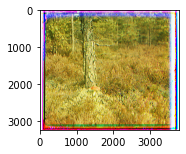

Green Shift: [48, 16]
Red Shift: [92, 32]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


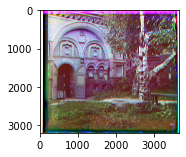

Green Shift: [4, 4]
Red Shift: [60, 12]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


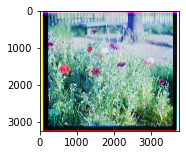

Green Shift: [36, -16]
Red Shift: [92, -29]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


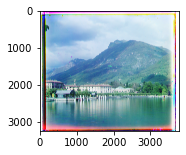

Green Shift: [28, -10]
Red Shift: [84, -7]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


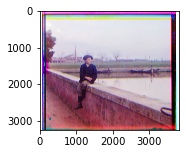

In [78]:
image_pyramid_ncc("./my_selected_data/sunset.tif", "./results/sunset_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./my_selected_data/siren.tif", "./results/siren_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./my_selected_data/mushroom.tif", "./results/mushroom_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./my_selected_data/woman_in_building.tif", "./results/woman_in_building_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./my_selected_data/poppies.tif", "./results/poppies_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./my_selected_data/lake.tif", "./results/lake_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./my_selected_data/boy_on_bridge.tif", "./results/boy_on_bridge_pyramid_ncc.jpg", 75)

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/25281069.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


Green Shift: [20, 0]
Red Shift: [56, -4]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


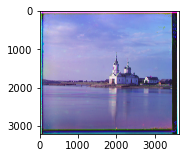

Green Shift: [36, 22]
Red Shift: [-28, 12]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


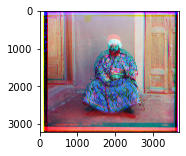

Green Shift: [56, 12]
Red Shift: [116, 12]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


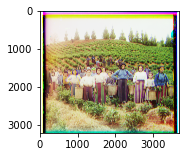

Green Shift: [40, 16]
Red Shift: [88, 20]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


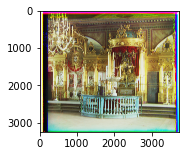

Green Shift: [44, 4]
Red Shift: [92, 8]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


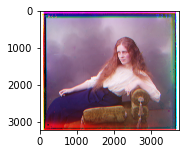

Green Shift: [68, 7]
Red Shift: [156, 12]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


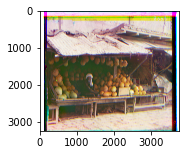

Green Shift: [44, 24]
Red Shift: [100, 28]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


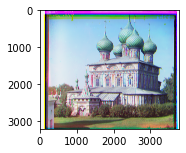

Green Shift: [28, -11]
Red Shift: [92, -27]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


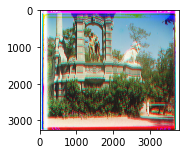

Green Shift: [68, 24]
Red Shift: [156, 32]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


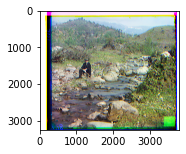

Green Shift: [36, 12]
Red Shift: [92, 12]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


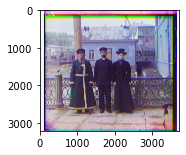

Green Shift: [28, 4]
Red Shift: [68, 28]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


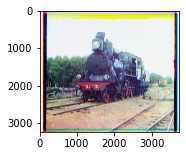

In [79]:
image_pyramid_ncc("./data/church.tif", "./results/church_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./data/emir.tif", "./results/emir_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./data/harvesters.tif", "./results/harvesters_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./data/icon.tif", "./results/icon_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./data/lady.tif", "./results/lady_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./data/melons.tif", "./results/melons_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./data/onion_church.tif", "./results/onion_church_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./data/sculpture.tif", "./results/sculpture_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./data/self_portrait.tif", "./results/self_portrait_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./data/three_generations.tif", "./results/three_generations_pyramid_ncc.jpg", 75)
image_pyramid_ncc("./data/train.tif", "./results/train_pyramid_ncc.jpg", 75)

# Edge Detection To Align Emir Better

In [80]:

from skimage import filters

In [ ]:
# def sobel_image_pyramid_ncc(filename, out_filename, quality):
#     # name of the input file
#     imname = filename
#     # read in the image
#     im = skio.imread(imname)
#     # convert to double (might want to do this later on to save memory)    
#     im = sk.img_as_float(im)
#     # compute the height of each part (just 1/3 of total)
#     height = np.floor(im.shape[0] / 3.0).astype(np.int)
#     # separate color channels
#     b = im[:height]
#     g = im[height: 2*height]
#     r = im[2*height: 3*height]
#     b_sob = filters.sobel(b)
#     g_sob = filters.sobel(g)
#     r_sob = filters.sobel(r)
#     # align g and r to b 
#     # align g 
#     shift_g, disp_g, center_g = image_pyramid(g_sob,b_sob)
#     print("Green Shift: " + str(shift_g))
#     ag = np.roll(g, shift_g, axis=(0,1))
#     # ag_shift = image_pyramid(g, b)
#     # align r
#     shift_r, disp_r, center_r = image_pyramid(r_sob,b_sob)
#     print("Red Shift: " + str(shift_r))
#     ar = np.roll(r, shift_r, axis=(0,1))
#     # ar_shift = image_pyramid(r, b)
#     # ag = pyramid_align(g, b)
#     # ar = pyramid_align(r, b) 
#     # create a color image
#     im_out = np.dstack([ar, ag, b])
#     # im_out = np.dstack([ar, ag, b])
#     # save the image
#     fname = out_filename
#     skio.imsave(fname, im_out, quality=quality)
#     # display the image
#     fig, ax = subplots(figsize=(2.5, 2.5))
#     ax.imshow(im_out)
#     skio.show()

In [28]:
# def sobel_image_pyramid_ncc(filename, out_filename, quality):
#     # name of the input file
#     imname = filename
#     # read in the image
#     im = skio.imread(imname)
#     # convert to double (might want to do this later on to save memory)    
#     im = sk.img_as_float(im)
#     # compute the height of each part (just 1/3 of total)
#     height = np.floor(im.shape[0] / 3.0).astype(np.int)
#     # separate color channels
#     b = im[:height]
#     g = im[height: 2*height]
#     r = im[2*height: 3*height]
#     b_sob = filters.sobel(b)
#     g_sob = filters.sobel(g)
#     r_sob = filters.sobel(r)
#     # align g and r to b 
#     # align g 
#     shift_g, disp_g, center_g = image_pyramid(g_sob,b_sob)
#     print("Green Shift: " + str(shift_g))
#     ag = np.roll(g, shift_g, axis=(0,1))
#     # ag_shift = image_pyramid(g, b)
#     # align r
#     shift_r, disp_r, center_r = image_pyramid(r_sob,b_sob)
#     print("Red Shift: " + str(shift_r))
#     ar = np.roll(r, shift_r, axis=(0,1))
#     # ar_shift = image_pyramid(r, b)
#     # ag = pyramid_align(g, b)
#     # ar = pyramid_align(r, b) 
#     # create a color image
#     im_out = np.dstack([ar, ag, b])
#     # im_out = np.dstack([ar, ag, b])
#     # save the image
#     fname = out_filename
#     skio.imsave(fname, im_out, quality=quality)
#     # display the image
#     fig, ax = subplots(figsize=(2.5, 2.5))
#     ax.imshow(im_out)
#     skio.show()

# Create filtered image of emir for writeup purposes

In [29]:
# im = skio.imread("./data/emir.tif")
# # convert to double (might want to do this later on to save memory)    
# im = sk.img_as_float(im)
# skio.imsave("./results/emir_as_jpg.jpg", im, quality=75)
# filtered_im = filters.sobel(im)
# skio.imsave("./results/emir_filtered_sobel.jpg", filtered_im, quality=75)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Run edge detection version of image pyramid on images that did not perform as well in the original implementation: 

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/1866435346.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


Green Shift: [48, 20]
Red Shift: [100, 36]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


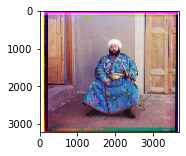

Green Shift: [28, -11]
Red Shift: [124, -26]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


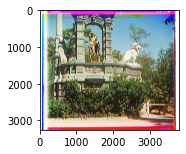

In [30]:
# sobel_image_pyramid_ncc("./data/emir.tif", "./results/sobel_emir.jpg", 75)
# sobel_image_pyramid_ncc("./data/sculpture.tif", "./results/sobel_sculpture.jpg", 75);

# Sobel Edge Detection

In [81]:
from scipy import ndimage

In [86]:
def sobel_edge_filter(im):
    # create masks
    vert_mask = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    horiz_mask = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    # convolve image with vertical mask 
    im = filters.gaussian(im, 10)
    convolved_image_vertical = ndimage.convolve(im, vert_mask)
    # convolve image with horizontal mask
    convolved_image_horizontal = ndimage.convolve(im, horiz_mask)
    # combine the horizontal and vertical edges 
    gradient_magnitude = np.sqrt(np.square(convolved_image_vertical) + np.square(convolved_image_horizontal))
    # gradient_magnitude *= 255.0 / gradient_magnitude.max()
    return gradient_magnitude
    

In [87]:
im = skio.imread("./data/emir.tif")
# convert to double (might want to do this later on to save memory)    
im = sk.img_as_float(im)
skio.imsave("./results/emir_as_jpg.jpg", im, quality=75)
filtered_im = sobel_edge_filter(im)
skio.imsave("./results/emir_filtered_sobel.jpg", filtered_im, quality=75)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [88]:
def sobel_image_pyramid(filename, out_filename, quality):
    # name of the input file
    imname = filename
    # read in the image
    im = skio.imread(imname)
    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)
    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(np.int)
    # separate color channels
    b = im[:height]
    g = im[height: 2*height]
    r = im[2*height: 3*height]
    b_sob = sobel_edge_filter(b)
    g_sob = sobel_edge_filter(g)
    r_sob = sobel_edge_filter(r)
    # align g 
    shift_g, disp_g, center_g = image_pyramid(g_sob,b_sob)
    print("Green Shift: " + str(shift_g))
    ag = np.roll(g, shift_g, axis=(0,1))
    # align r
    shift_r, disp_r, center_r = image_pyramid(r_sob,b_sob)
    print("Red Shift: " + str(shift_r))
    ar = np.roll(r, shift_r, axis=(0,1))
    # create a color image
    im_out = np.dstack([ar, ag, b])
    # save the image
    fname = out_filename
    skio.imsave(fname, im_out, quality=quality)
    # display the image
    fig, ax = subplots(figsize=(2.5, 2.5))
    ax.imshow(im_out)
    skio.show()

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/4168991842.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


Green Shift: [47, 20]
Red Shift: [92, 28]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


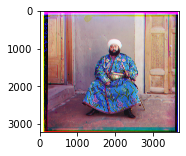

In [89]:
sobel_image_pyramid("./data/emir.tif", "./results/sobel_emir.jpg", 75)

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/4168991842.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


Green Shift: [28, -11]
Red Shift: [124, -26]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


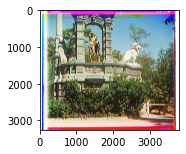

In [90]:
sobel_image_pyramid("./data/sculpture.tif", "./results/sobel_sculpture.jpg", 75)

# Cropping Image Borders 

In [91]:
def crop_image_borders(im):
    vert_mask = np.repeat(np.array([[-2, -1, 0, 1, 2]]), repeats = 20, axis=0)
    num_tries = int(ceil(im.shape[1] * 0.05))
    middle_vertical = im.shape[0] // 2
    middle_horizontal = im.shape[1] // 2

    # cut left side
    min_score = float("inf")
    best_position_left = 0 
    for i in range(0, num_tries, 5):
        start_index_h = i 
        stop_index_h = i + len(vert_mask[0])
        start_index_v = middle_vertical
        stop_index_v = middle_vertical + len(vert_mask)
        im_slice = im[start_index_v:stop_index_v, start_index_h:stop_index_h]
        curr_score = calculate_ssd(vert_mask, im_slice)
        if curr_score < min_score:
            min_score = curr_score
            best_position_left = i 
    left = best_position_left

    # cut top edge
    min_score = float("inf")
    best_position_top = 0 
    for i in range(0, num_tries, 5):
        start_index_h = middle_horizontal
        stop_index_h = middle_horizontal + len(vert_mask[0])
        start_index_v = i
        stop_index_v = i + len(vert_mask)
        im_slice = im[start_index_v:stop_index_v, start_index_h:stop_index_h]
        curr_score = calculate_ssd(vert_mask, im_slice)
        if curr_score < min_score:
            min_score = curr_score
            best_position_top = i 
    top = best_position_top

    # cut right side
    min_score = float("inf")
    best_position_right= 0 
    for i in range(0, num_tries, 5):
        start_index_h = im.shape[1] - (i + len(vert_mask[0])) 
        stop_index_h = start_index_h + len(vert_mask[0])
        start_index_v = middle_vertical
        stop_index_v = middle_vertical + len(vert_mask)
        im_slice = im[start_index_v:stop_index_v, start_index_h:stop_index_h]
        curr_score = calculate_ssd(vert_mask, im_slice)
        if curr_score < min_score:
            min_score = curr_score
            best_position_right = i 
    right = im.shape[1] - best_position_right

    # cut bottom side
    min_score = float("inf")
    best_position_bottom = 0 
    for i in range(0, num_tries, 5):
        start_index_h = middle_horizontal
        stop_index_h = middle_horizontal + len(vert_mask[0])
        start_index_v = im.shape[0] - (i + len(vert_mask))
        stop_index_v = start_index_v + len(vert_mask)
        im_slice = im[start_index_v:stop_index_v, start_index_h:stop_index_h]
        curr_score = calculate_ssd(vert_mask, im_slice)
        if curr_score < min_score:
            min_score = curr_score
            best_position_bottom = i 
    bottom = im.shape[0] - best_position_bottom
    # print("FINAL SLICES: ", left, right, top, bottom)
    return left, top, right, bottom 

In [149]:
def sobel_image_pyramid_cropped(filename, out_filename, quality):
    # name of the input file
    imname = filename
    # read in the image
    im = skio.imread(imname)
    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)
    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(np.int)
    # separate color channels
    b = im[:height]
    g = im[height: 2*height]
    r = im[2*height: 3*height]
    b_sob = sobel_edge_filter(b)
    g_sob = sobel_edge_filter(g)
    r_sob = sobel_edge_filter(r)
    # align g 
    shift_g, disp_g, center_g = image_pyramid(g_sob,b_sob)
    print("Green Shift: " + str(shift_g))
    ag = np.roll(g, shift_g, axis=(0,1))
    # align r
    shift_r, disp_r, center_r = image_pyramid(r_sob,b_sob)
    print("Red Shift: " + str(shift_r))
    ar = np.roll(r, shift_r, axis=(0,1))
    # create a color image
    im_out = np.dstack([ar, ag, b])
    # save the image
    leftB, topB, rightB, bottomB = crop_image_borders(b_sob)
    leftR, topR, rightR, bottomR = crop_image_borders(r_sob)
    leftG, topG, rightG, bottomG = crop_image_borders(g_sob)

    im_out = im_out[max(topB, topR, topG):min(bottomB, bottomR, bottomG), max(leftB, leftR, leftG):min(rightB, rightR, rightG)]
    fname = out_filename
    skio.imsave(fname, im_out, quality=quality)
    # display the image
    fig, ax = subplots(figsize=(2.5, 2.5))
    ax.imshow(im_out)
    skio.show()

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/2772522239.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


Green Shift: [47, 20]
Red Shift: [92, 28]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


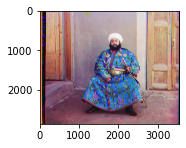

In [93]:
sobel_image_pyramid_cropped("./data/emir.tif", "./results/sobel_emir_crop.jpg", 75)

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/2772522239.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


Green Shift: [28, -11]
Red Shift: [124, -26]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


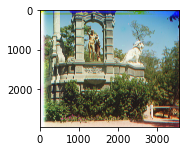

In [94]:
sobel_image_pyramid_cropped("./data/sculpture.tif", "./results/sobel_sculpture_cropped.jpg", 75);

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/2772522239.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


Green Shift: [4, 8]
Red Shift: [60, 12]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


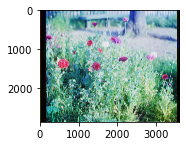

In [95]:
sobel_image_pyramid_cropped("./my_selected_data/poppies.tif", "./results/sobel_poppies_cropped.jpg", 75);

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/2772522239.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


Green Shift: [68, -41]
Red Shift: [108, -64]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


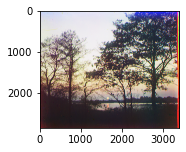

In [96]:
sobel_image_pyramid_cropped("./my_selected_data/sunset.tif", "./results/sobel_sunset_cropped.jpg", 75);

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/2405898174.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


Green Shift: [48, -5]
Red Shift: [92, -24]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


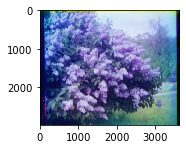

In [150]:
sobel_image_pyramid_cropped("./my_selected_data/siren.tif", "./results/sobel_siren_cropped.jpg", 75);

/var/folders/2j/1yw2v36d3d16zw8qvh7tztyc0000gn/T/ipykernel_30396/2405898174.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = np.floor(im.shape[0] / 3.0).astype(np.int)


Green Shift: [36, 16]
Red Shift: [76, 30]


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


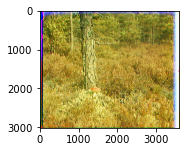

In [153]:
sobel_image_pyramid_cropped("./my_selected_data/mushroom.tif", "./results/sobel_mushrooom_cropped.jpg", 75);

# White Balance Adjustment 

In [134]:
import skimage.color as sc

In [166]:
def grey_world(filename, out_filename, quality):
    input_file = filename
    im = skio.imread(input_file)
    im = sk.img_as_float(im)
    im_cropped = crop_image(im, 4)
    # im = im / 255.0
    # Automatic (AWB)
    # • Grey World: force average color of scene to grey
    # Compute the mean color over the entire image
    # [256, 256, 3] => [256*256, 3]
    avg_color = np.mean(im_cropped.reshape((-1, 3)), axis=0)
    # [1, 3]
    # Scale the averge color to be grey (0.5)
    scaling = 0.5 / avg_color
    # Apply the scaling to the entire image
    balanced_im = im * scaling[None, None, :]
    fname = out_filename
    skio.imsave(fname, balanced_im, quality=quality)
    # display the image
    fig, ax = subplots(figsize=(2.5, 2.5))
    ax.imshow(balanced_im)
    skio.show()

Lossy conversion from float64 to uint8. Range [0.0, 1.2514122490619737]. Convert image to uint8 prior to saving to suppress this warning.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


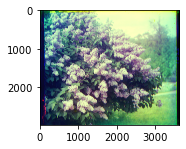

In [167]:
grey_world("./results/sobel_siren_cropped.jpg", "./results/siren_white_balanced.jpg", 75)

Lossy conversion from float64 to uint8. Range [0.0, 2.192634208523916]. Convert image to uint8 prior to saving to suppress this warning.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


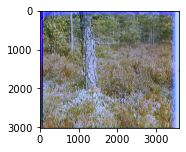

In [168]:
grey_world("./results/sobel_mushrooom_cropped.jpg", "./results/mushroom_white_balanced.jpg", 75)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


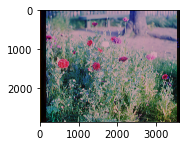

In [169]:
grey_world("./results/sobel_poppies_cropped.jpg", "./results/poppies_white_balanced.jpg", 75)